In [350]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [351]:
df_train = pd.read_csv(r'E:\Data\Databeat\Logistic_Dataset\train.csv')
df_test = pd.read_csv(r'E:\Data\Databeat\Logistic_Dataset\test.csv')

In [352]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [353]:
df_train.shape

(891, 12)

In [354]:
for col in df_train.columns:
    print('{} has {}% of Null Values i.e. has {} Null values'.format(col, (df_train[col].isnull().sum()*100/len(df_train)), df_train[col].isnull().sum()))

PassengerId has 0.0% of Null Values i.e. has 0 Null values
Survived has 0.0% of Null Values i.e. has 0 Null values
Pclass has 0.0% of Null Values i.e. has 0 Null values
Name has 0.0% of Null Values i.e. has 0 Null values
Sex has 0.0% of Null Values i.e. has 0 Null values
Age has 19.865319865319865% of Null Values i.e. has 177 Null values
SibSp has 0.0% of Null Values i.e. has 0 Null values
Parch has 0.0% of Null Values i.e. has 0 Null values
Ticket has 0.0% of Null Values i.e. has 0 Null values
Fare has 0.0% of Null Values i.e. has 0 Null values
Cabin has 77.10437710437711% of Null Values i.e. has 687 Null values
Embarked has 0.2244668911335578% of Null Values i.e. has 2 Null values


In [355]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "H": 8}
data = [df_train, df_test]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("H0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)
# we can now drop the cabin feature
df_train = df_train.drop(['Cabin'], axis=1)
df_test = df_test.drop(['Cabin'], axis=1)

In [356]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,8
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,8
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,8
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,8
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,8
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,3


In [357]:
df_train['Age'] = df_train['Age'].fillna(24.00)   # Most Common age

In [358]:
df_train['Embarked'] = df_train['Embarked'].fillna('S')    #Most Common Embarked

In [359]:
df_train["Name"] = df_train['Name'].astype(str)

In [360]:
data = [df_train, df_test]

for dataset in data:
    for i in range(len(dataset)):
        name = dataset.loc[i,'Name'].split(',')[1]
        dataset.loc[i, 'Title'] = name.split('.')[0]

In [361]:
data = [df_train, df_test]

for dataset in data:
    dataset.drop(['Name'], axis = 1, inplace = True)

In [362]:
data = [df_train, df_test]
gender = {'male':1, 'female':0}
for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(gender)

In [363]:
data = [df_train, df_test]
embarked = {'S':1, 'C':0, 'Q':2}
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked)

In [364]:
df_train['Title'].unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer'], dtype=object)

In [365]:
df_train['Title'].value_counts()

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Col               2
 Mlle              2
 Major             2
 the Countess      1
 Sir               1
 Capt              1
 Mme               1
 Ms                1
 Jonkheer          1
 Don               1
 Lady              1
Name: Title, dtype: int64

In [366]:
data = [df_train, df_test]
title = {' Mr':1, ' Mrs':2, ' Miss':3, ' Master':4, 'Dr':0, 'Rev':0, 'Col':0, 'Mlle':0, 'Major':0,
            'Ms':0, 'Don':0, 'the Countess':0, 'Sir':0, 'Lady':0, 'Jonkheer':0, 'Mme':0, "Capt":0}
for dataset in data:
    dataset['Title'] = dataset['Title'].map(title)

In [367]:
df_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck,Title
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,1,8,1.0
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,0,3,2.0
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,1,8,3.0
3,4,1,1,0,35.0,1,0,113803,53.1000,1,3,2.0
4,5,0,3,1,35.0,0,0,373450,8.0500,1,8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,211536,13.0000,1,8,NaN
887,888,1,1,0,19.0,0,0,112053,30.0000,1,2,3.0
888,889,0,3,0,24.0,1,2,W./C. 6607,23.4500,1,8,3.0
889,890,1,1,1,26.0,0,0,111369,30.0000,0,3,1.0


In [368]:
data = [df_train, df_test]

for dataset in data:
    dataset.drop(['Ticket'], axis = 1, inplace = True)

In [369]:
df_train.drop(['PassengerId'], axis = 1, inplace = True)

In [370]:
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title
0,0,3,1,22.0,1,0,7.2500,1,8,1.0
1,1,1,0,38.0,1,0,71.2833,0,3,2.0
2,1,3,0,26.0,0,0,7.9250,1,8,3.0
3,1,1,0,35.0,1,0,53.1000,1,3,2.0
4,0,3,1,35.0,0,0,8.0500,1,8,1.0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,1,8,NaN
887,1,1,0,19.0,0,0,30.0000,1,2,3.0
888,0,3,0,24.0,1,2,23.4500,1,8,3.0
889,1,1,1,26.0,0,0,30.0000,0,3,1.0


In [371]:
df_train.dropna(axis = 0, inplace = True)
df_train.reset_index()
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title
0,0,3,1,22.0,1,0,7.2500,1,8,1.0
1,1,1,0,38.0,1,0,71.2833,0,3,2.0
2,1,3,0,26.0,0,0,7.9250,1,8,3.0
3,1,1,0,35.0,1,0,53.1000,1,3,2.0
4,0,3,1,35.0,0,0,8.0500,1,8,1.0
...,...,...,...,...,...,...,...,...,...,...
885,0,3,0,39.0,0,5,29.1250,2,8,2.0
887,1,1,0,19.0,0,0,30.0000,1,2,3.0
888,0,3,0,24.0,1,2,23.4500,1,8,3.0
889,1,1,1,26.0,0,0,30.0000,0,3,1.0


In [372]:
X_train = df_train.drop(['Survived'], axis = 1)
y_train = df_train['Survived']

In [373]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title
0,3,1,22.0,1,0,7.2500,1,8,1.0
1,1,0,38.0,1,0,71.2833,0,3,2.0
2,3,0,26.0,0,0,7.9250,1,8,3.0
3,1,0,35.0,1,0,53.1000,1,3,2.0
4,3,1,35.0,0,0,8.0500,1,8,1.0
...,...,...,...,...,...,...,...,...,...
885,3,0,39.0,0,5,29.1250,2,8,2.0
887,1,0,19.0,0,0,30.0000,1,2,3.0
888,3,0,24.0,1,2,23.4500,1,8,3.0
889,1,1,26.0,0,0,30.0000,0,3,1.0


In [374]:
def normalize_data(X):
    X_norm = X.copy()
    min_X = np.min(X, axis = 0)
    max_X = np.max(X, axis = 0)
    X_norm = (X-min_X)/(max_X - min_X)
    return X_norm

In [375]:
X_train = normalize_data(X_train)

In [376]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title
0,1.0,1.0,0.271174,0.125,0.000000,0.014151,0.5,1.000,0.000000
1,0.0,0.0,0.472229,0.125,0.000000,0.139136,0.0,0.375,0.333333
2,1.0,0.0,0.321438,0.000,0.000000,0.015469,0.5,1.000,0.666667
3,0.0,0.0,0.434531,0.125,0.000000,0.103644,0.5,0.375,0.333333
4,1.0,1.0,0.434531,0.000,0.000000,0.015713,0.5,1.000,0.000000
...,...,...,...,...,...,...,...,...,...
885,1.0,0.0,0.484795,0.000,0.833333,0.056848,1.0,1.000,0.333333
887,0.0,0.0,0.233476,0.000,0.000000,0.058556,0.5,0.250,0.666667
888,1.0,0.0,0.296306,0.125,0.333333,0.045771,0.5,1.000,0.666667
889,0.0,1.0,0.321438,0.000,0.000000,0.058556,0.0,0.375,0.000000


In [377]:
X_train = np.array(X_train)

In [378]:
X_train = np.hstack((np.ones((X_train.shape[0],1)),X_train))

In [379]:
y_train = np.array(y_train)

In [380]:
X_train.shape

(864, 10)

In [381]:
for col in df_train.columns:
    print('{} has {}% of Null Values i.e. has {} Null values'.format(col, (df_train[col].isnull().sum()*100/len(df_train)), df_train[col].isnull().sum()))

Survived has 0.0% of Null Values i.e. has 0 Null values
Pclass has 0.0% of Null Values i.e. has 0 Null values
Sex has 0.0% of Null Values i.e. has 0 Null values
Age has 0.0% of Null Values i.e. has 0 Null values
SibSp has 0.0% of Null Values i.e. has 0 Null values
Parch has 0.0% of Null Values i.e. has 0 Null values
Fare has 0.0% of Null Values i.e. has 0 Null values
Embarked has 0.0% of Null Values i.e. has 0 Null values
Deck has 0.0% of Null Values i.e. has 0 Null values
Title has 0.0% of Null Values i.e. has 0 Null values


In [382]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 864 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  864 non-null    int64  
 1   Pclass    864 non-null    int64  
 2   Sex       864 non-null    int64  
 3   Age       864 non-null    float64
 4   SibSp     864 non-null    int64  
 5   Parch     864 non-null    int64  
 6   Fare      864 non-null    float64
 7   Embarked  864 non-null    int64  
 8   Deck      864 non-null    int32  
 9   Title     864 non-null    float64
dtypes: float64(3), int32(1), int64(6)
memory usage: 70.9 KB


In [383]:
for col in df_test.columns:
    print('{} has {}% of Null Values i.e. has {} Null values'.format(col, (df_test[col].isnull().sum()*100/len(df_test)), df_test[col].isnull().sum()))

PassengerId has 0.0% of Null Values i.e. has 0 Null values
Pclass has 0.0% of Null Values i.e. has 0 Null values
Sex has 0.0% of Null Values i.e. has 0 Null values
Age has 20.574162679425836% of Null Values i.e. has 86 Null values
SibSp has 0.0% of Null Values i.e. has 0 Null values
Parch has 0.0% of Null Values i.e. has 0 Null values
Fare has 0.23923444976076555% of Null Values i.e. has 1 Null values
Embarked has 0.0% of Null Values i.e. has 0 Null values
Deck has 0.0% of Null Values i.e. has 0 Null values
Title has 1.674641148325359% of Null Values i.e. has 7 Null values


In [384]:
df_test['Age'].value_counts()

24.0    17
21.0    17
22.0    16
30.0    15
18.0    13
        ..
7.0      1
60.5     1
26.5     1
76.0     1
34.5     1
Name: Age, Length: 79, dtype: int64

In [385]:
df_test['Age'] = df_test['Age'].fillna(24.0)

In [386]:
df_test['Fare'].value_counts()

7.7500     21
26.0000    19
8.0500     17
13.0000    17
7.8958     11
           ..
9.3250      1
14.4583     1
15.0333     1
25.4667     1
21.0750     1
Name: Fare, Length: 169, dtype: int64

In [387]:
df_test['Fare'] = df_test['Fare'].fillna(7.750)

In [388]:
df_test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Deck           0
Title          7
dtype: int64

In [389]:
df_test.dropna(axis = 0, inplace = True)
df_test.reset_index()
df_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title
0,892,3,1,34.5,0,0,7.8292,2,8,1.0
1,893,3,0,47.0,1,0,7.0000,1,8,2.0
2,894,2,1,62.0,0,0,9.6875,2,8,1.0
3,895,3,1,27.0,0,0,8.6625,1,8,1.0
4,896,3,0,22.0,1,1,12.2875,1,8,2.0
...,...,...,...,...,...,...,...,...,...,...
412,1304,3,0,28.0,0,0,7.7750,1,8,3.0
413,1305,3,1,24.0,0,0,8.0500,1,8,1.0
415,1307,3,1,38.5,0,0,7.2500,1,8,1.0
416,1308,3,1,24.0,0,0,8.0500,1,8,1.0


In [390]:
idx = df_test['PassengerId']
df_test.drop(['PassengerId'], axis = 1, inplace = True)

In [391]:
X_train.shape, y_train.shape

((864, 10), (864,))

In [392]:
theta = np.zeros(X_train.shape[1])
theta.shape

(10,)

In [393]:
def sigmoid(X,theta):
    z = np.dot(X,theta.T)
    return 1.0/(1+np.exp(-z))

In [394]:
def cost_function(h,y):
    loss = ((-y * np.log(h))-((1-y)* np.log(1-h))).mean()
    return loss

In [395]:
def gradient_descent(X,h,y):
    return np.dot(X.T,(h-y))/y.shape[0]

In [396]:
def update_loss(theta,learning_rate,gradient):
    return theta-(learning_rate*gradient)

In [397]:
def predict(X,theta):
    threshold = 0.5
    outcome = []
    result = sigmoid(X,theta)
    for i in range(X.shape[0]):
        if result[i] <= threshold:
            outcome.append(0)
        else:
            outcome.append(1)
    return outcome

In [398]:
def plot_cost_function(cost):
    plt.plot(cost,label="loss")
    plt.xlabel('Iteration',fontweight="bold",fontsize = 15)
    plt.ylabel('Loss',fontweight="bold",fontsize = 15)
    plt.title("Cost Function",fontweight="bold",fontsize = 20)
    plt.legend()
    plt.show()

theta_0 : 1.1780784048540196 , theta_1 : -1.5684072397431819, theta_2 : -1.6782093374623397


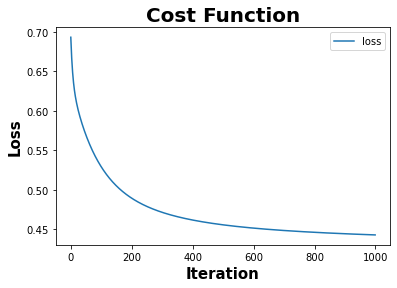

In [399]:
theta = np.zeros(X_train.shape[1])

num_iter = 1000

cost = []

for i in range(num_iter):
    h = sigmoid(X_train,theta)
    cost.append(cost_function(h,y_train))
    gradient = gradient_descent(X_train,h,y_train)
    theta = update_loss(theta,0.1,gradient)


outcome = predict(X_train,theta)
print("theta_0 : {} , theta_1 : {}, theta_2 : {}".format(theta[0],theta[1],theta[2]))
plot_cost_function(cost)

In [400]:
X_test = np.array(df_test)
X_test = normalize_data(X_test)
X_test = np.hstack((np.ones((X_test.shape[0],1)),X_test))

In [401]:
y_pred = predict(X_test,theta)

In [402]:
y_pred

[0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,


In [403]:
y_pred_df = pd.DataFrame(y_pred, index = idx, columns= ['Survived'])
#idx = pd.DataFrame(idx)

In [404]:
y_pred_df

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,0
...,...
1304,1
1305,0
1307,0


In [405]:
y_pred_df.to_csv('E:\Data\Databeat\Logistic_Dataset\submission.csv')